### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [24]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [25]:
sample_data.dtypes

user_id            int64
age               object
drinks_coffee       bool
height           float64
dtype: object

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [26]:
diff_1 = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    mean_nocoff = bootsample[bootsample['drinks_coffee'] == False]['height'].mean()
    diff_1.append(mean_coff - mean_nocoff)

(array([   24.,   109.,   546.,  1516.,  2623.,  2826.,  1664.,   568.,
          106.,    18.]),
 array([-0.43028277, -0.07929544,  0.2716919 ,  0.62267923,  0.97366656,
         1.3246539 ,  1.67564123,  2.02662857,  2.3776159 ,  2.72860323,
         3.07959057]),
 <a list of 10 Patch objects>)

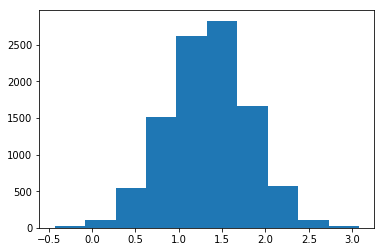

In [27]:
plt.hist(diff_1)

In [28]:
np.percentile(diff_1, 0.5), np.percentile(diff_1, 99.5)

(0.10258900080919674, 2.5388333707966284)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [29]:
diff_2 = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['age'] == '>=21']['height'].mean()
    mean_nocoff = bootsample[bootsample['age'] == '<21']['height'].mean()
    diff_2.append(mean_coff - mean_nocoff)

(array([    8.,    47.,   329.,  1196.,  2589.,  3083.,  1903.,   714.,
          117.,    14.]),
 array([ 2.84743507,  3.11400025,  3.38056542,  3.64713059,  3.91369577,
         4.18026094,  4.44682611,  4.71339129,  4.97995646,  5.24652163,
         5.51308681]),
 <a list of 10 Patch objects>)

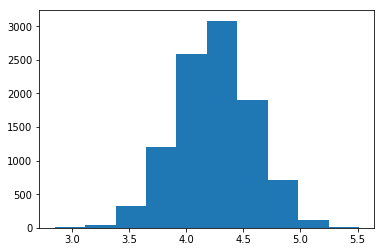

In [30]:
plt.hist(diff_2)

In [31]:
np.percentile(diff_2, 0.5), np.percentile(diff_2, 99.5)

(3.3652749452554089, 5.0932450670660936)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [32]:
diff_3 = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    df_nocoff = bootsample[bootsample['drinks_coffee'] == False]
    mean_nocoff_under_21 = df_nocoff[df_nocoff['age'] == '<21']['height'].mean()
    diff_3.append(mean_coff - mean_nocoff_under_21)

(array([   10.,    86.,   542.,  1746.,  2884.,  2706.,  1506.,   426.,
           86.,     8.]),
 array([ 0.65394391,  0.98910496,  1.32426602,  1.65942707,  1.99458812,
         2.32974918,  2.66491023,  3.00007129,  3.33523234,  3.67039339,
         4.00555445]),
 <a list of 10 Patch objects>)

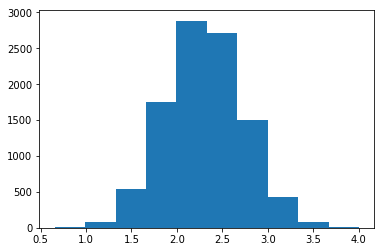

In [33]:
plt.hist(diff_3)

In [34]:
np.percentile(diff_3, 2.5), np.percentile(diff_3, 97.5)

(1.4800559191047322, 3.1557727292912143)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [35]:
diff_4 = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    df_nocoff = bootsample[bootsample['drinks_coffee'] == False]
    mean_nocoff_over_21 = df_nocoff[df_nocoff['age'] == '>=21']['height'].mean()
    diff_4.append(mean_coff - mean_nocoff_over_21)

(array([  1.00000000e+00,   2.00000000e+00,   2.30000000e+01,
          2.63000000e+02,   1.71400000e+03,   3.89100000e+03,
          3.12400000e+03,   8.75000000e+02,   1.04000000e+02,
          3.00000000e+00]),
 array([-8.35981993, -7.64578495, -6.93174998, -6.217715  , -5.50368002,
        -4.78964504, -4.07561006, -3.36157508, -2.6475401 , -1.93350513,
        -1.21947015]),
 <a list of 10 Patch objects>)

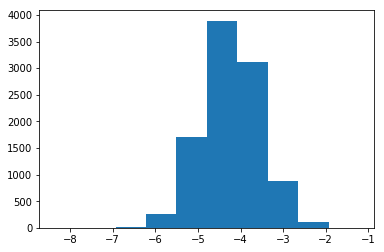

In [36]:
plt.hist(diff_4)

In [37]:
np.percentile(diff_4, 2.5), np.percentile(diff_4, 97.5)

(-5.5405922660641735, -2.8932722883008859)